In [ ]:
%pip install --upgrade --quiet  langchain langchain-community langchain-openai langchain-experimental neo4j wikipedia tiktoken yfiles_jupyter_graphs

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
camelot 12.6.29 requires SQLAlchemy<0.8.0,>=0.7.7, but you have sqlalchemy 2.0.37 which is incompatible.


In [ ]:
pip install pypdf camelot

  Using cached SQLAlchemy-0.7.10-py3-none-any.whl
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.37
    Uninstalling SQLAlchemy-2.0.37:
      Successfully uninstalled SQLAlchemy-2.0.37
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.3.15 requires SQLAlchemy<3,>=1.4, but you have sqlalchemy 0.7.10 which is incompatible.
bigframes 1.33.0 requires sqlalchemy<3.0dev,>=1.4, but you have sqlalchemy 0.7.10 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 0.7.10 which is incompatible.
langchain 0.3.15 requires SQLAlchemy<3,>=1.4, but you have sqlalchemy 0.7.10 which is incompatible.


In [ ]:
# import re
# import json
# from langchain.document_loaders import PyPDFLoader
# import camelot

# # Load PDF and Extract Text
# loader = PyPDFLoader("/content/coa-120486116-01.PDF")
# documents = loader.load()

# # Initialize containers
# key_value_pairs = {}
# tables = []
# free_text = []

# # Step 1: Detect Key-Value Pairs
# def detect_key_value_pairs(text):
#     # Regex to match "key: value" or similar patterns
#     pattern = r"([a-zA-Z\s]+):\s*([\w\s/.,-]+)"
#     matches = re.findall(pattern, text)
#     return {key.strip(): value.strip() for key, value in matches}

# for doc in documents:
#     # Extract key-value pairs
#     kv_pairs = detect_key_value_pairs(doc.page_content)
#     key_value_pairs.update(kv_pairs)

# # Step 2: Detect Tabular Data
# try:
#     # Extract tables from the PDF
#     tables = camelot.read_pdf("/content/coa-120486116-01.PDF", pages="all")
#     print(f"Number of tables detected: {len(tables)}")

#     # If tables are detected, display the first one
#     if len(tables) > 0:
#         print(tables[0].df)
#     else:
#         print("No tables detected.")
# except Exception as e:

#     print(f"Error: {e}")
# # Step 3: Detect Free Text
# for doc in documents:
#     # Split content into lines
#     lines = doc.page_content.split("\n")
#     for line in lines:
#         # Identify free text (not key-value pairs and non-empty)
#         if ":" not in line and len(line.split()) > 3:
#             free_text.append(line.strip())

# # Organize Data into a Unified Structure
# extracted_data = {
#     "key_value_pairs": key_value_pairs,
#     "tables": [table.df.to_dict() for table in tables],
#     "free_text": free_text,
# }

# # Save Data to JSON
# with open("extracted_data.json", "w") as f:
#     json.dump(extracted_data, f, indent=4)

# print("Data saved in 'extracted_data.json'.")


In [ ]:
# from langchain.document_loaders import PyPDFLoader
# from sentence_transformers import SentenceTransformer
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np
# import pandas as pd

# # Load PDF and Extract Text
# loader = PyPDFLoader("/content/coa-120486116-01.PDF")
# documents = loader.load()

# # Initialize SentenceTransformer Model
# model = SentenceTransformer('all-MiniLM-L6-v2')

# # Initialize Data Storage
# data_points = []

# # Step 1: Process Key-Value Pairs
# for key, value in extracted_data["key_value_pairs"].items():
#     embedding = model.encode(value)  # Generate embedding for the value
#     metadata = {"type": "key_value", "key": key, "value": value}
#     data_points.append((embedding, metadata))

# # Step 2: Process Tables
# for table in extracted_data["tables"]:
#     for row in table.values():
#         row_text = " | ".join(f"{col}: {val}" for col, val in row.items())
#         embedding = model.encode(row_text)
#         metadata = {"type": "table", "content": row_text}
#         data_points.append((embedding, metadata))

# # Step 3: Process Free Text
# for sentence in extracted_data["free_text"]:
#     embedding = model.encode(sentence)  # Generate embedding for the sentence
#     metadata = {"type": "free_text", "content": sentence}
#     data_points.append((embedding, metadata))

# # Separate Embeddings and Metadata
# embeddings, metadatas = zip(*data_points)

# print("Data successfully stored in vector database.")

# # ------------------------------------------------------------
# # Perform Similarity Search (Top-5 Results)
# # ------------------------------------------------------------

# # Encode the query
# query = "What is the effective date and expiration date of this certificate 120486116T001"
# query_embedding = model.encode(query)
# # Compute cosine similarity between the query and stored embeddings
# cosine_scores = cosine_similarity([query_embedding], embeddings)

# # Get the top-5 most similar results
# top_indices = np.argsort(cosine_scores[0])[-5:][::-1]  # Descending order

# # Collect the top-5 results into unstructured context
# unstructured_context = []

# print("\nTop 5 Relevant Results:")
# for idx in top_indices:
#     metadata = metadatas[idx]
#     if metadata["type"] == "key_value":
#         result = f"Key: {metadata['key']}\nValue: {metadata['value']}"
#     elif metadata["type"] == "table":
#         result = f"Table Row: {metadata['content']}"
#     elif metadata["type"] == "free_text":
#         result = f"Text: {metadata['content']}"

#     unstructured_context.append(result)
#     print(result)
#     print("-" * 50)



# print(f"Top-5 context saved to {unstructured_context}.")


In [ ]:
import re
from langchain.document_loaders import PyPDFLoader

# Load PDF and Extract Text
loader = PyPDFLoader("/content/coa-120486116-01.PDF")
documents = loader.load()

# Container for sentences
sentences = []

# Function to split text into sentences
def split_into_sentences(text):
    # Basic splitting using common sentence delimiters
    return re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)

# Extract sentences from each document
for doc in documents:
    sentences.extend(split_into_sentences(doc.page_content))

# Remove empty sentences and strip whitespace
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

# Load SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the query
query_embedding = model.encode(query)

# Encode all sentences
sentence_embeddings = model.encode(sentences)

# Compute cosine similarity
cosine_scores = cosine_similarity([query_embedding], sentence_embeddings)

# Get top N similar sentences
top_indices = np.argsort(cosine_scores[0])[10:][::-1]  # Descending order
unstructured_context = [sentences[idx] for idx in top_indices]


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re
from langchain.document_loaders import PyPDFLoader

# Define the function
def get_unstructured_context(query):
    """
    Extracts the most relevant sentences from a PDF file based on a user query.

    Parameters:
        pdf_path (str): Path to the PDF file.
        query (str): User query.
        top_n (int): Number of top similar sentences to return. Default is 5.

    Returns:
        list: Top `top_n` sentences most relevant to the query.
    """
    # Load PDF and extract text
    pdf_path = "/content/coa-120486116-01.PDF"
    top_n=5
    loader = PyPDFLoader(pdf_path)
    documents = loader.load()

    # Container for sentences
    sentences = []

    # Function to split text into sentences
    def split_into_sentences(text):
        # Basic splitting using common sentence delimiters
        return re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)

    # Extract sentences from each document
    for doc in documents:
        sentences.extend(split_into_sentences(doc.page_content))

    # Remove empty sentences and strip whitespace
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    print("Successfully Extracted")

    # Load SentenceTransformer model
    model = SentenceTransformer('all-MiniLM-L6-v2')

    # Encode the query
    query_embedding = model.encode(query)

    # Encode all sentences
    sentence_embeddings = model.encode(sentences)

    # Compute cosine similarity
    cosine_scores = cosine_similarity([query_embedding], sentence_embeddings)

    # Get top N similar sentences
    top_indices = np.argsort(cosine_scores[0])[-top_n:][::-1]  # Descending order
    unstructured_context = [sentences[idx] for idx in top_indices]

    return unstructured_context

# Example usage





In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load CSV
structured_results = pd.read_csv("/content/coa_docs_sample.csv")

# Initialize SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to dynamically generate sentences for each row
def generate_dynamic_sentence(row):
    # Dynamically create a sentence for the row
    sentence = ", ".join(
        [f"{col}: {val}" for col, val in row.items() if pd.notnull(val)]
    )
    return sentence

# Process Rows
data_points = []

for _, row in structured_results.iterrows():
    # Generate dynamic sentence for the row
    dynamic_sentence = generate_dynamic_sentence(row)

    # Generate embedding
    embedding = model.encode(dynamic_sentence)

    # Store embedding and metadata
    metadata = row.to_dict()  # Convert row to dictionary for metadata
    data_points.append((embedding, metadata, dynamic_sentence))

# Separate Embeddings, Metadata, and Sentences
embeddings, metadatas, sentences = zip(*data_points)

print("Structured data successfully processed and embeddings generated.")

# ------------------------------------------------------------
# Perform Similarity Search (Top-5 Results)
# ------------------------------------------------------------


Structured data successfully processed and embeddings generated.


In [ ]:

# Encode the query
query = "What is the effective date and expiration date of this certificate 120486116T001"
query_embedding = model.encode(query)

# Compute cosine similarity between the query and stored embeddings
cosine_scores = cosine_similarity([query_embedding], embeddings)

# Get the top-5 most similar results
top_indices = np.argsort(cosine_scores[0])[-10:][::-1]  # Descending order
structured_context = []
# Display the top-5 results
print("\nTop 10 Relevant Results:")
for idx in top_indices:
    print(f"Row Sentence: {sentences[idx]}")
    print(f"Row Metadata: {metadatas[idx]}")
    structured_context.append(sentences[idx])
    print(cosine_scores[0][idx])
    print("-" * 50)


Top 10 Relevant Results:
Row Sentence: bin_num: 1023449, coa_file_link: https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1023449&passcofonumber=M00097364A.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=097000&cofomatadata5=M00097364A.PDF, coa_file_name: M00097364A.PDF, coa_number: CO 097364, gryps_checksum: ca448ea2ef138da64a08df495ca3b924, gryps_updated_at: 2025-01-23 18:07:08.212, gryps_execution_id: 11b84a43-8187-41ab-8b76-cc14a8795681_5ecac4cd-b7af-4982-9cb0-95875fc4cdab, gryps_instance_id: 5ecac4cd-b7af-4982-9cb0-95875fc4cdab
Row Metadata: {'bin_num': 1023449, 'coa_file_link': 'https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1023449&passcofonumber=M00097364A.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=097000&cofomatadata5=M00097364A.PDF', 'coa_file_name': 'M00097364A.PDF', 'coa_number': 'CO 097364', 'gryps_checksum': 'ca448ea2ef138da64a08df495ca3b924', 'gryps_updated_at':

In [ ]:
structured_context

['bin_num: 1023449, coa_file_link: https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1023449&passcofonumber=M00097364A.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=097000&cofomatadata5=M00097364A.PDF, coa_file_name: M00097364A.PDF, coa_number: CO 097364, gryps_checksum: ca448ea2ef138da64a08df495ca3b924, gryps_updated_at: 2025-01-23 18:07:08.212, gryps_execution_id: 11b84a43-8187-41ab-8b76-cc14a8795681_5ecac4cd-b7af-4982-9cb0-95875fc4cdab, gryps_instance_id: 5ecac4cd-b7af-4982-9cb0-95875fc4cdab',
 'bin_num: 1023449, coa_file_link: https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1023449&passcofonumber=M000101859.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=101000&cofomatadata5=M000101859.PDF, coa_file_name: M000101859.PDF, coa_number: CO 101859, gryps_checksum: ca9fb2ae840603bc3578616d55321d1c, gryps_updated_at: 2025-01-23 18:07:08.212, gryps_execution_id: 11b84a43-8187-41ab-8b76

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define the function
def get_structured_context(query, top_n=10):
    """
    Finds the most relevant rows from a structured CSV dataset based on a query.

    Parameters:
        csv_path (str): Path to the CSV file containing structured data.
        query (str): The user query for which relevant rows are to be found.
        top_n (int): Number of top relevant results to return. Default is 10.

    Returns:
        list: Top `top_n` sentences and their metadata relevant to the query.
    """
    # Load CSV
    csv_path = "/content/coa_docs_sample.csv"
    structured_results = pd.read_csv(csv_path)

    # Initialize SentenceTransformer
    model = SentenceTransformer('all-MiniLM-L6-v2')

    # Function to dynamically generate sentences for each row
    def generate_dynamic_sentence(row):
        return ", ".join(
            [f"{col}: {val}" for col, val in row.items() if pd.notnull(val)]
        )

    # Process Rows
    data_points = []
    for _, row in structured_results.iterrows():
        dynamic_sentence = generate_dynamic_sentence(row)
        embedding = model.encode(dynamic_sentence)
        metadata = row.to_dict()
        data_points.append((embedding, metadata, dynamic_sentence))

    # Separate Embeddings, Metadata, and Sentences
    embeddings, metadatas, sentences = zip(*data_points)

    # Encode the query
    query_embedding = model.encode(query)

    # Compute cosine similarity between the query and stored embeddings
    cosine_scores = cosine_similarity([query_embedding], embeddings)

    # Get top N most similar results
    top_indices = np.argsort(cosine_scores[0])[-top_n:][::-1]  # Descending order

    # Collect results
    structured_context = []
    for idx in top_indices:
        structured_context.append({
            "sentence": sentences[idx],
            "metadata": metadatas[idx],
            "score": cosine_scores[0][idx]
        })

    return structured_context



In [ ]:
combined_context = "\n".join([
        "Structured Data:\n" + " ".join(structured_context),
        "Unstructured Data:\n" + " ".join(unstructured_context)
    ])

In [ ]:
from openai import ChatCompletion
import openai

openai.api_key = "sk-tH33moiPl8IOnhJKHYGEAfeLwtMOeFl_mVHK7W5JQ6T3BlbkFJxKqsN4k4dsGQLzzoFv4m9BQ25CIMibYwoQX0EerRMA"
response = ChatCompletion.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are an expert assistant combining graph and document data."},
        {"role": "user", "content": f"Answer based on the following data:\n{combined_context}\n Query :{ query }"}
    ]
)
print(response['choices'][0]['message']['content'])


The effective date of the certificate 120486116T001 is 07/05/2012 and the expiration date is 10/03/2012.


In [ ]:
import gradio as gr
from openai import ChatCompletion
import openai

# Set up OpenAI API key
openai.api_key = "add-key"

# Define the function to call the model
def query_chatbot(user_query):
    structured_context = ['bin_num: 1023449, coa_file_link: https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1023449&passcofonumber=M00097364A.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=097000&cofomatadata5=M00097364A.PDF, coa_file_name: M00097364A.PDF, coa_number: CO 097364, gryps_checksum: ca448ea2ef138da64a08df495ca3b924, gryps_updated_at: 2025-01-23 18:07:08.212, gryps_execution_id: 11b84a43-8187-41ab-8b76-cc14a8795681_5ecac4cd-b7af-4982-9cb0-95875fc4cdab, gryps_instance_id: 5ecac4cd-b7af-4982-9cb0-95875fc4cdab',
 'bin_num: 1023449, coa_file_link: https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1023449&passcofonumber=M000101859.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=101000&cofomatadata5=M000101859.PDF, coa_file_name: M000101859.PDF, coa_number: CO 101859, gryps_checksum: ca9fb2ae840603bc3578616d55321d1c, gryps_updated_at: 2025-01-23 18:07:08.212, gryps_execution_id: 11b84a43-8187-41ab-8b76-cc14a8795681_5ecac4cd-b7af-4982-9cb0-95875fc4cdab, gryps_instance_id: 5ecac4cd-b7af-4982-9cb0-95875fc4cdab',
 'bin_num: 1023449, coa_file_link: https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1023449&passcofonumber=M000104444.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=104000&cofomatadata5=M000104444.PDF, coa_file_name: M00104444A.PDF, coa_number: CO 104444, gryps_checksum: 9456187f412ac085b5ee7001a269b49f, gryps_updated_at: 2025-01-23 18:07:08.212, gryps_execution_id: 11b84a43-8187-41ab-8b76-cc14a8795681_5ecac4cd-b7af-4982-9cb0-95875fc4cdab, gryps_instance_id: 5ecac4cd-b7af-4982-9cb0-95875fc4cdab',
 'bin_num: 1082908, coa_file_link: https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1082908&passcofonumber=M000109238.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=109000&cofomatadata5=M000109238.PDF, coa_file_name: M00109238A.PDF, coa_number: CO 109238, gryps_checksum: 39f1b7e93b9fe81a4123b6b55746e23b, gryps_updated_at: 2025-01-23 17:55:24.937, gryps_execution_id: 7f7ad870-f97f-45a0-8ee7-0593c01f88ef_0f79f730-971e-46f5-9361-4db3074be17c, gryps_instance_id: 0f79f730-971e-46f5-9361-4db3074be17c',
 'bin_num: 1023449, coa_file_link: https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1023449&passcofonumber=M000099836.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=099000&cofomatadata5=M000099836.PDF, coa_file_name: M00099836C.PDF, coa_number: CO 099836, gryps_checksum: 980c2328ac254872018add28c1f23bcc, gryps_updated_at: 2025-01-23 18:07:08.212, gryps_execution_id: 11b84a43-8187-41ab-8b76-cc14a8795681_5ecac4cd-b7af-4982-9cb0-95875fc4cdab, gryps_instance_id: 5ecac4cd-b7af-4982-9cb0-95875fc4cdab',
 'bin_num: 1082908, coa_file_link: https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1082908&passcofonumber=M000109238.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=109000&cofomatadata5=M000109238.PDF, coa_file_name: M000109238.PDF, coa_number: CO 109238, gryps_checksum: e95fa377a3c3ef7b9b1a5387911189ea, gryps_updated_at: 2025-01-23 17:55:24.937, gryps_execution_id: 7f7ad870-f97f-45a0-8ee7-0593c01f88ef_0f79f730-971e-46f5-9361-4db3074be17c, gryps_instance_id: 0f79f730-971e-46f5-9361-4db3074be17c',
 'bin_num: 1023449, coa_file_link: https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1023449&passcofonumber=M000106586.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=106000&cofomatadata5=M000106586.PDF, coa_file_name: M00106586A.PDF, coa_number: CO 106586, gryps_checksum: cef5728cb21c9ad6e3159e6a61290e01, gryps_updated_at: 2025-01-23 18:07:08.212, gryps_execution_id: 11b84a43-8187-41ab-8b76-cc14a8795681_5ecac4cd-b7af-4982-9cb0-95875fc4cdab, gryps_instance_id: 5ecac4cd-b7af-4982-9cb0-95875fc4cdab',
 'bin_num: 1023449, coa_file_link: https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1023449&passcofonumber=M000095723.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=095000&cofomatadata5=M000095723.PDF, coa_file_name: M00095723C.PDF, coa_number: CO 095723, gryps_checksum: ba7191f4489025e65400ea28629d06b3, gryps_updated_at: 2025-01-23 18:07:08.212, gryps_execution_id: 11b84a43-8187-41ab-8b76-cc14a8795681_5ecac4cd-b7af-4982-9cb0-95875fc4cdab, gryps_instance_id: 5ecac4cd-b7af-4982-9cb0-95875fc4cdab',
 'bin_num: 1082908, coa_file_link: https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1082908&passcofonumber=M000109238.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=109000&cofomatadata5=M000109238.PDF, coa_file_name: M00109238B.PDF, coa_number: CO 109238, gryps_checksum: cb5b3304fd937778aea16a370de977cc, gryps_updated_at: 2025-01-23 17:55:24.937, gryps_execution_id: 7f7ad870-f97f-45a0-8ee7-0593c01f88ef_0f79f730-971e-46f5-9361-4db3074be17c, gryps_instance_id: 0f79f730-971e-46f5-9361-4db3074be17c',
 'bin_num: 1023449, coa_file_link: https://a810-bisweb.nyc.gov/bisweb/CofoDocumentContentServlet?bin=1023449&passcofonumber=M000052143.PDF&requestid=0&cofomatadata1=COFO&cofomatadata2=M&cofomatadata3=000&cofomatadata4=052000&cofomatadata5=M000052143.PDF, coa_file_name: M000052143.PDF, coa_number: CO 52143, gryps_checksum: 8804530068a38e87cc28335b2a012456, gryps_updated_at: 2025-01-23 18:07:08.212, gryps_execution_id: 11b84a43-8187-41ab-8b76-cc14a8795681_5ecac4cd-b7af-4982-9cb0-95875fc4cdab, gryps_instance_id: 5ecac4cd-b7af-4982-9cb0-95875fc4cdab']

    print("unstructured_context",structured_context)
    unstructured_context = get_unstructured_context(user_query)
    print("structured_context",unstructured_context)

    combined_context = "\n".join([
        "Structured Data:\n" + " ".join(structured_context),
        "Unstructured Data:\n" + " ".join(unstructured_context)
    ])

    print(combined_context)

    try:
        response = ChatCompletion.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "You are an expert assistant combining graph and document data. Summarize Structured Data and answer queries."},
                {"role": "user", "content": f"Answer based on the following data:\n{combined_context}\n Query: {user_query}"}
            ]
        )
        return response['choices'][0]['message']['content']
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Define Gradio UI
iface = gr.Interface(
    fn=query_chatbot,  # Function to process the query
    inputs="text",  # Single text input
    outputs="text",  # Single text output
    title="Graph & Document Data Chatbot",
    description="Ask a question, and the chatbot will combine structured and unstructured data to provide an accurate response."
)

# Launch the UI
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e70b1ec3f7d2ec3ed2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
def get_shape(tup):
    if not isinstance(tup, tuple):
        return ()
    return (len(tup),) + get_shape(tup[0])


In [ ]:
print(get_shape(embeddings))

(583,)


In [ ]:
len(query_embedding)

384

In [ ]:
len(embeddings[0])

384

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
embeddings = np.array(embeddings)
embeddings = embeddings[top_indices]
query_embedding = np.array(query_embedding).reshape((1,-1))

In [ ]:
embeddings.shape

(10, 384)

In [ ]:
query_embedding.shape

(1, 384)

In [ ]:
embeddings = np.concatenate((embeddings,query_embedding))

In [ ]:
embeddings.shape

(11, 384)

In [ ]:
similarity_matrix = cosine_similarity(embeddings)

In [ ]:
similarity_matrix

array([[0.9999999 , 0.9832846 , 0.9827391 , 0.98135513, 0.98243546,
        0.9806953 , 0.9840361 , 0.9812119 , 0.9852998 , 0.982768  ,
        0.21959487],
       [0.9832846 , 1.        , 0.99392045, 0.9857827 , 0.99096406,
        0.98648   , 0.9918118 , 0.99262464, 0.98541087, 0.9925661 ,
        0.21159683],
       [0.9827391 , 0.99392045, 1.        , 0.9878605 , 0.98974013,
        0.98680806, 0.99289143, 0.99259883, 0.98588765, 0.9948004 ,
        0.21041241],
       [0.98135513, 0.9857827 , 0.9878605 , 0.9999999 , 0.9886416 ,
        0.99797785, 0.983928  , 0.98352265, 0.9935797 , 0.9858358 ,
        0.20892408],
       [0.98243546, 0.99096406, 0.98974013, 0.9886416 , 1.        ,
        0.9883524 , 0.9878932 , 0.9911159 , 0.98913956, 0.99142027,
        0.20687258],
       [0.9806953 , 0.98648   , 0.98680806, 0.99797785, 0.9883524 ,
        0.9999999 , 0.9823314 , 0.9823365 , 0.9928452 , 0.9863273 ,
        0.20685576],
       [0.9840361 , 0.9918118 , 0.99289143, 0.983928  , 0.

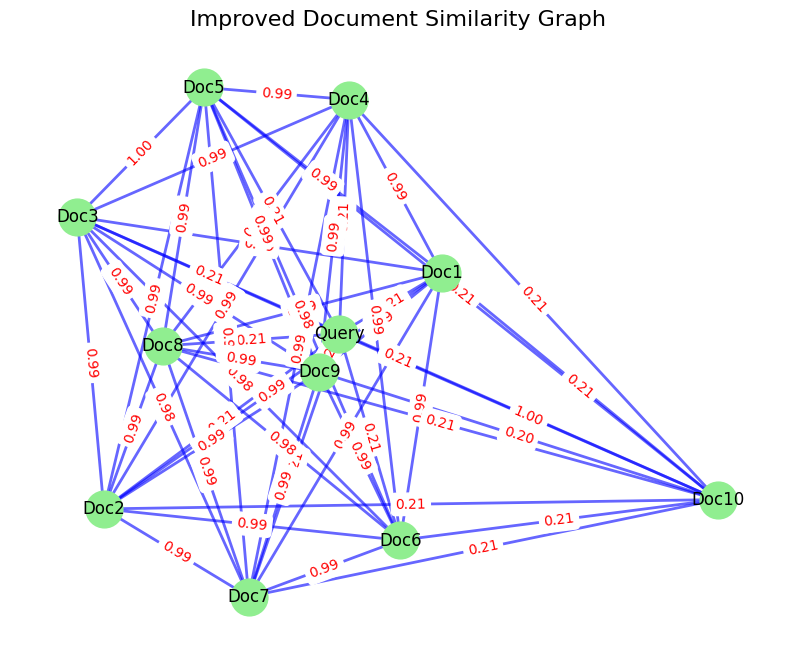

In [ ]:
# Define a similarity threshold for adding edges
similarity_threshold = 0.1  # Adjust this as needed
num_nodes = len(embeddings)
# Initialize a new graph with improved aesthetics
G = nx.Graph()

# Add nodes
G.add_node("Query")  # Center node
for i in range(1, num_nodes):
    G.add_node(f"{metadatas[top_indices[i-1]]['coa_file_name']}")

# Add edges based on threshold
for i in range(1, num_nodes):  # Start with the query (node 0)
    similarity = similarity_matrix[-1, i]
    if similarity >= similarity_threshold:  # Add edge if similarity exceeds threshold
        G.add_edge("Query", f"Doc{i}", weight=similarity)

for i in range(1, num_nodes):  # Check between documents
    for j in range(i + 1, num_nodes):
        similarity = similarity_matrix[i, j]
        if similarity >= similarity_threshold:
            G.add_edge(f"Doc{i}", f"Doc{j}", weight=similarity)

nodes_to_remove = [node for node in G.nodes if G.degree(node) == 0]
G.remove_nodes_from(nodes_to_remove)

# Define positions manually for aesthetics
pos = nx.spring_layout(G, seed=42)  # Use spring layout as the base
pos["Query"] = [0, 0]  # Place the query in the center

# Adjust document positions based on similarity
for i in range(1, num_nodes):
    similarity = similarity_matrix[-1, i]
    distance = 1 / max(similarity, 0.01)  # Inverse proportionality, avoid div by 0
    angle = (i - 1) * (2 * np.pi / (num_nodes - 1))  # Evenly space documents
    pos[f"{metadatas[top_indices[i-1]]['coa_file_name']}"] = [distance * np.cos(angle), distance * np.sin(angle)]

# Draw the graph with improved aesthetics
plt.figure(figsize=(10, 8))

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightgreen")
nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

# Draw edges with weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
nx.draw_networkx_edges(G, pos, width=2, edge_color="blue", alpha=0.6)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges},
    font_size=10, font_color="red"
)

# Display the graph
plt.title("Improved Document Similarity Graph", fontsize=16)
plt.axis("off")
plt.show()


In [ ]:
# Define a similarity threshold for adding edges
similarity_threshold = 0.6  # Adjust this as needed

# Initialize a new graph with improved aesthetics
G = nx.Graph()

num_nodes = len(embeddings)
# Add nodes
G.add_node("Query")  # Center node
for i in range(1, num_nodes):
    G.add_node(f"Doc{i}")

# Add edges based on threshold
for i in range(1, num_nodes):  # Start with the query (node 0)
    similarity = similarity_matrix[0, i]
    if similarity >= similarity_threshold:  # Add edge if similarity exceeds threshold
        G.add_edge("Query", f"Doc{i}", weight=similarity)

for i in range(1, num_nodes):  # Check between documents
    for j in range(i + 1, num_nodes):
        similarity = similarity_matrix[i, j]
        if similarity >= similarity_threshold:
            G.add_edge(f"Doc{i}", f"Doc{j}", weight=similarity)


In [ ]:
# # Define a similarity threshold for adding edges
# similarity_threshold = 0.1  # Adjust this as needed

# G = nx.Graph()

# num_nodes = len(embeddings)
# # Add nodes (Query + Documents)
# G.add_node("Query")
# for i in range(1, num_nodes):
#     G.add_node(f"Doc{i}")

# # Add edges based on similarity threshold
# edges_added = False
# for i in range(1, num_nodes):  # Check similarity with the query
#     similarity = similarity_matrix[-1, i]
#     if similarity >= similarity_threshold:
#         G.add_edge("Query", f"Doc{i}", weight=similarity)
#         edges_added = True

# for i in range(1, num_nodes):  # Check between documents
#     for j in range(i + 1, num_nodes):
#         similarity = similarity_matrix[i, j]
#         if similarity >= similarity_threshold:
#             G.add_edge(f"Doc{i}", f"Doc{j}", weight=similarity)
#             edges_added = True

# # Remove nodes that don't have any edges (unconnected nodes)
# # nodes_to_remove = [node for node in G.nodes if G.degree(node) == 0]
# # G.remove_nodes_from(nodes_to_remove)

In [ ]:
# Define positions manually for aesthetics
pos = nx.spring_layout(G, seed=42)  # Use spring layout as the base
pos["Query"] = [0, 0]  # Place the query in the center

# Adjust document positions based on similarity
for i in range(1, num_nodes):
    similarity = similarity_matrix[-1, i]
    distance = 1 / max(similarity, 0.01)  # Inverse proportionality, avoid div by 0
    angle = (i - 1) * (2 * np.pi / (num_nodes - 1))  # Evenly space documents
    pos[f"Doc{i}"] = [distance * np.cos(angle), distance * np.sin(angle)]

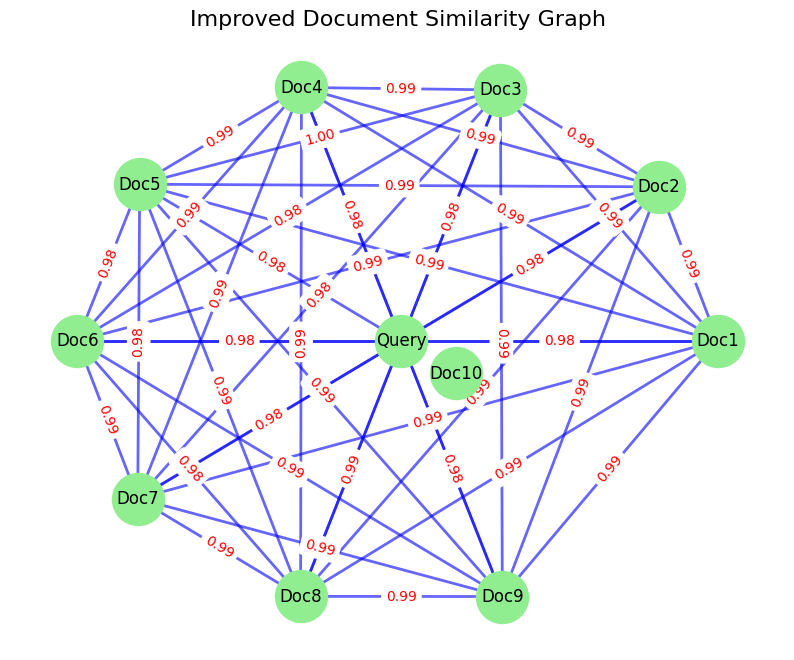

In [ ]:
# Draw the graph with improved aesthetics
plt.figure(figsize=(10, 8))

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=1400, node_color="lightgreen")
nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

# Draw edges with weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
nx.draw_networkx_edges(G, pos, width=2, edge_color="blue", alpha=0.6)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges},
    font_size=10, font_color="red"
)

# Display the graph
plt.title("Improved Document Similarity Graph", fontsize=16)
plt.axis("off")
plt.show()

In [ ]:
cosine_scores

array([[0.18322393, 0.2115968 , 0.18606761, 0.19716409, 0.16668749,
        0.18940255, 0.19722384, 0.15637636, 0.156426  , 0.18142848,
        0.19168395, 0.17505789, 0.16726288, 0.18526629, 0.1704537 ,
        0.15174833, 0.19805077, 0.16736239, 0.16097072, 0.16562782,
        0.15998542, 0.17361405, 0.18445063, 0.18615776, 0.16609472,
        0.20114037, 0.1886135 , 0.1796047 , 0.18129906, 0.1851466 ,
        0.15103492, 0.15731202, 0.18689272, 0.18061629, 0.20687261,
        0.19537517, 0.17109065, 0.18567795, 0.17019081, 0.1895102 ,
        0.16411808, 0.14933456, 0.20399901, 0.17025447, 0.2195949 ,
        0.1540316 , 0.19500221, 0.20150581, 0.1924681 , 0.18022099,
        0.19358155, 0.15798435, 0.1823665 , 0.17445756, 0.1803712 ,
        0.1820972 , 0.16733004, 0.1717484 , 0.18947302, 0.1927675 ,
        0.18868303, 0.180321  , 0.18123177, 0.16269769, 0.19149855,
        0.19641984, 0.17028409, 0.1721215 , 0.1649755 , 0.20075569,
        0.19040054, 0.1922939 , 0.15524682, 0.17